In [1]:
import pandas as pd
import datetime
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

/home/mikel/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df = pd.read_csv('../data/nba_data_processed.csv', index_col = 0)

In [3]:
df.head()

,DATE,START,VISITOR,PTS,HOME,PTS.1,ATTEND,VISITOR_MP,VISITOR_FG,VISITOR_FGA,...,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_USG%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,LABEL,YEAR
0,2009-10-27,7:30p,Boston Celtics,95.0,Cleveland Cavaliers,89.0,20562.0,240.0,32.0,72.0,...,58.6,7.9,17.0,13.4,100.0,100.4,107.2,2,0,2010
1,2009-10-27,8:30p,Washington Wizards,102.0,Dallas Mavericks,91.0,19871.0,240.0,39.0,84.0,...,53.3,6.7,12.7,9.0,100.0,101.6,113.9,2,0,2010
2,2009-10-27,10:30p,Los Angeles Clippers,92.0,Los Angeles Lakers,99.0,18997.0,240.0,39.0,87.0,...,48.6,13.3,5.6,13.6,100.0,101.6,94.4,2,1,2010
3,2009-10-27,10:00p,Houston Rockets,87.0,Portland Trail Blazers,96.0,20403.0,240.0,30.0,81.0,...,69.7,9.3,19.0,23.1,100.0,99.4,90.1,2,1,2010
4,2009-10-28,7:00p,Indiana Pacers,109.0,Atlanta Hawks,120.0,17998.0,240.0,39.0,73.0,...,65.2,15.9,10.9,9.1,100.0,119.0,108.1,3,1,2010


In [4]:
df.columns

Index(['DATE', 'START', 'VISITOR', 'PTS', 'HOME', 'PTS.1', 'ATTEND',
       'VISITOR_MP', 'VISITOR_FG', 'VISITOR_FGA', 'VISITOR_FG%', 'VISITOR_3P',
       'VISITOR_3PA', 'VISITOR_3P%', 'VISITOR_FT', 'VISITOR_FTA',
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PF', 'VISITOR_PTS', 'VISITOR_+/-', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_USG%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_MP', 'HOME_FG', 'HOME_FGA', 'HOME_FG%', 'HOME_3P',
       'HOME_3PA', 'HOME_3P%', 'HOME_FT', 'HOME_FTA', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PF', 'HOME_PTS', 'HOME_+/-', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',

In [5]:
df = df[['DATE', 'START', 'VISITOR', 'HOME', 'ATTEND',
       'VISITOR_FG%', 'VISITOR_3P%', 
       'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB', 'VISITOR_TRB',
       'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK', 'VISITOR_TOV',
       'VISITOR_PTS', 'VISITOR_TS%',
       'VISITOR_eFG%', 'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%',
       'VISITOR_DRB%', 'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%',
       'VISITOR_BLK%', 'VISITOR_TOV%', 'VISITOR_ORtg',
       'VISITOR_DRtg', 'HOME_FG%', 'HOME_3P%', 'HOME_FT%', 'HOME_ORB',
       'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL', 'HOME_BLK', 'HOME_TOV',
       'HOME_PTS', 'HOME_TS%', 'HOME_eFG%', 'HOME_3PAr',
       'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%', 'HOME_AST%',
       'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_ORtg',
       'HOME_DRtg', 'DAY_OF_WEEK', 'YEAR', 'LABEL']]

In [6]:
df.head()

,DATE,START,VISITOR,HOME,ATTEND,VISITOR_FG%,VISITOR_3P%,VISITOR_FT%,VISITOR_ORB,VISITOR_DRB,...,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,YEAR,LABEL
0,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,0.444,0.474,0.846,6.0,32.0,...,45.7,58.6,7.9,17.0,13.4,100.4,107.2,2,2010,0
1,2009-10-27,8:30p,Washington Wizards,Dallas Mavericks,19871.0,0.464,0.308,0.833,9.0,37.0,...,47.7,53.3,6.7,12.7,9.0,101.6,113.9,2,2010,0
2,2009-10-27,10:30p,Los Angeles Clippers,Los Angeles Lakers,18997.0,0.448,0.200,0.688,15.0,36.0,...,48.0,48.6,13.3,5.6,13.6,101.6,94.4,2,2010,1
3,2009-10-27,10:00p,Houston Rockets,Portland Trail Blazers,20403.0,0.370,0.278,0.759,10.0,23.0,...,60.7,69.7,9.3,19.0,23.1,99.4,90.1,2,2010,1
4,2009-10-28,7:00p,Indiana Pacers,Atlanta Hawks,17998.0,0.534,0.556,0.840,6.0,34.0,...,46.7,65.2,15.9,10.9,9.1,119.0,108.1,3,2010,1


In [7]:
teams = list(df['HOME'].unique())

In [8]:
teams

['Cleveland Cavaliers',
 'Dallas Mavericks',
 'Los Angeles Lakers',
 'Portland Trail Blazers',
 'Atlanta Hawks',
 'Boston Celtics',
 'Denver Nuggets',
 'Golden State Warriors',
 'Los Angeles Clippers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Minnesota Timberwolves',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Chicago Bulls',
 'Charlotte Hornets',
 'Detroit Pistons',
 'Indiana Pacers',
 'Brooklyn Nets',
 'New Orleans Pelicans',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Utah Jazz',
 'Houston Rockets',
 'Milwaukee Bucks',
 'New York Knicks',
 'Washington Wizards',
 'Sacramento Kings']

In [9]:
## Creating a df of a single team:

In [11]:
team = 'Cleveland Cavaliers'

In [12]:
df_team = df[(df['HOME'] == team) | (df['VISITOR'] == team)]

In [13]:
df_team.head()

,DATE,START,VISITOR,HOME,ATTEND,VISITOR_FG%,VISITOR_3P%,VISITOR_FT%,VISITOR_ORB,VISITOR_DRB,...,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,YEAR,LABEL
0,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,0.444,0.474,0.846,6.0,32.0,...,45.7,58.6,7.9,17.0,13.4,100.4,107.2,2,2010,0
15,2009-10-28,7:00p,Cleveland Cavaliers,Toronto Raptors,20152.0,0.349,0.409,0.649,13.0,36.0,...,49.5,67.6,4.1,9.8,12.5,104.4,94.0,3,2010,1
25,2009-10-30,8:00p,Cleveland Cavaliers,Minnesota Timberwolves,19356.0,0.476,0.556,0.700,10.0,33.0,...,52.2,50.0,6.5,4.5,15.4,94.1,112.5,5,2010,0
31,2009-10-31,7:30p,Charlotte Hornets,Cleveland Cavaliers,20562.0,0.426,0.462,0.750,10.0,23.0,...,49.2,61.1,11.2,16.4,20.0,111.6,97.9,6,2010,1
51,2009-11-03,7:00p,Washington Wizards,Cleveland Cavaliers,20562.0,0.391,0.286,0.780,12.0,36.0,...,46.7,69.4,9.2,5.5,6.7,116.7,102.9,2,2010,1


In [14]:
df_team = df_team.reset_index()

In [15]:
df_team.head()

,index,DATE,START,VISITOR,HOME,ATTEND,VISITOR_FG%,VISITOR_3P%,VISITOR_FT%,VISITOR_ORB,...,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,YEAR,LABEL
0,0,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,0.444,0.474,0.846,6.0,...,45.7,58.6,7.9,17.0,13.4,100.4,107.2,2,2010,0
1,15,2009-10-28,7:00p,Cleveland Cavaliers,Toronto Raptors,20152.0,0.349,0.409,0.649,13.0,...,49.5,67.6,4.1,9.8,12.5,104.4,94.0,3,2010,1
2,25,2009-10-30,8:00p,Cleveland Cavaliers,Minnesota Timberwolves,19356.0,0.476,0.556,0.700,10.0,...,52.2,50.0,6.5,4.5,15.4,94.1,112.5,5,2010,0
3,31,2009-10-31,7:30p,Charlotte Hornets,Cleveland Cavaliers,20562.0,0.426,0.462,0.750,10.0,...,49.2,61.1,11.2,16.4,20.0,111.6,97.9,6,2010,1
4,51,2009-11-03,7:00p,Washington Wizards,Cleveland Cavaliers,20562.0,0.391,0.286,0.780,12.0,...,46.7,69.4,9.2,5.5,6.7,116.7,102.9,2,2010,1


In [16]:
df_team.columns

Index(['index', 'DATE', 'START', 'VISITOR', 'HOME', 'ATTEND', 'VISITOR_FG%',
       'VISITOR_3P%', 'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB',
       'VISITOR_TRB', 'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK',
       'VISITOR_TOV', 'VISITOR_PTS', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_ORtg', 'VISITOR_DRtg', 'HOME_FG%', 'HOME_3P%',
       'HOME_FT%', 'HOME_ORB', 'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL',
       'HOME_BLK', 'HOME_TOV', 'HOME_PTS', 'HOME_TS%', 'HOME_eFG%',
       'HOME_3PAr', 'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',
       'HOME_AST%', 'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_ORtg',
       'HOME_DRtg', 'DAY_OF_WEEK', 'YEAR', 'LABEL'],
      dtype='object')

In [17]:
always_cols = ['DATE', 'START', 'VISITOR', 'HOME', 'ATTEND','DAY_OF_WEEK', 'YEAR', 'LABEL']


home_cols = ['HOME_FG%', 'HOME_3P%',
       'HOME_FT%', 'HOME_ORB', 'HOME_DRB', 'HOME_TRB', 'HOME_AST', 'HOME_STL',
       'HOME_BLK', 'HOME_TOV', 'HOME_PTS', 'HOME_TS%', 'HOME_eFG%',
       'HOME_3PAr', 'HOME_FTr', 'HOME_ORB%', 'HOME_DRB%', 'HOME_TRB%',
       'HOME_AST%', 'HOME_STL%', 'HOME_BLK%', 'HOME_TOV%', 'HOME_ORtg',
       'HOME_DRtg']


visitor_cols = ['VISITOR_FG%',
       'VISITOR_3P%', 'VISITOR_FT%', 'VISITOR_ORB', 'VISITOR_DRB',
       'VISITOR_TRB', 'VISITOR_AST', 'VISITOR_STL', 'VISITOR_BLK',
       'VISITOR_TOV', 'VISITOR_PTS', 'VISITOR_TS%', 'VISITOR_eFG%',
       'VISITOR_3PAr', 'VISITOR_FTr', 'VISITOR_ORB%', 'VISITOR_DRB%',
       'VISITOR_TRB%', 'VISITOR_AST%', 'VISITOR_STL%', 'VISITOR_BLK%',
       'VISITOR_TOV%', 'VISITOR_ORtg', 'VISITOR_DRtg']

In [18]:
colums_team = ['FG%', '3P%',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PTS', 'TS%', 'eFG%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'ORtg',
       'DRtg', 'H_V']

In [19]:
df_t = pd.DataFrame()
h_v_list = []
for i in tqdm(range(len(df_team))):
    if df_team['HOME'][i] == team:
        
        df_t = df_t.append([list(df_team.iloc[i][home_cols].values)])
        h_v_list.append('H')
    if df_team['VISITOR'][i] == team:
        
        df_t = df_t.append([list(df_team.iloc[i][visitor_cols].values)])
        h_v_list.append('V')
    

100%|██████████| 915/915 [00:02<00:00, 329.96it/s]


In [20]:
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.414,0.353,0.781,6.0,26.0,32.0,17.0,7.0,9.0,13.0,...,0.457,15.8,81.3,45.7,58.6,7.9,17.0,13.4,100.4,107.2
0,0.349,0.409,0.649,13.0,36.0,49.0,19.0,4.0,2.0,14.0,...,0.446,24.1,83.7,50.5,65.5,4.1,3.4,12.4,94.0,104.4
0,0.476,0.556,0.700,10.0,33.0,43.0,24.0,11.0,5.0,11.0,...,0.238,23.8,68.8,47.8,60.0,11.9,6.9,10.6,112.5,94.1
0,0.581,0.563,0.643,5.0,27.0,32.0,22.0,9.0,9.0,17.0,...,0.226,17.9,73.0,49.2,61.1,11.2,16.4,20.0,111.6,97.9
0,0.419,0.423,0.704,13.0,29.0,42.0,25.0,8.0,3.0,7.0,...,0.314,26.5,70.7,46.7,69.4,9.2,5.5,6.7,116.7,102.9


In [21]:
df_t.columns[0]

0

In [22]:
# Renaming cols:
for i, col in enumerate(df_t.columns):
    df_t = df_t.rename(columns={col: colums_team[i]})


In [23]:
df_t.reset_index(drop=True, inplace=True)

In [24]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,ORtg,DRtg
0,0.414,0.353,0.781,6.0,26.0,32.0,17.0,7.0,9.0,13.0,...,0.457,15.8,81.3,45.7,58.6,7.9,17.0,13.4,100.4,107.2
1,0.349,0.409,0.649,13.0,36.0,49.0,19.0,4.0,2.0,14.0,...,0.446,24.1,83.7,50.5,65.5,4.1,3.4,12.4,94.0,104.4
2,0.476,0.556,0.700,10.0,33.0,43.0,24.0,11.0,5.0,11.0,...,0.238,23.8,68.8,47.8,60.0,11.9,6.9,10.6,112.5,94.1
3,0.581,0.563,0.643,5.0,27.0,32.0,22.0,9.0,9.0,17.0,...,0.226,17.9,73.0,49.2,61.1,11.2,16.4,20.0,111.6,97.9
4,0.419,0.423,0.704,13.0,29.0,42.0,25.0,8.0,3.0,7.0,...,0.314,26.5,70.7,46.7,69.4,9.2,5.5,6.7,116.7,102.9


In [25]:
df_team.head()

,index,DATE,START,VISITOR,HOME,ATTEND,VISITOR_FG%,VISITOR_3P%,VISITOR_FT%,VISITOR_ORB,...,HOME_TRB%,HOME_AST%,HOME_STL%,HOME_BLK%,HOME_TOV%,HOME_ORtg,HOME_DRtg,DAY_OF_WEEK,YEAR,LABEL
0,0,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,0.444,0.474,0.846,6.0,...,45.7,58.6,7.9,17.0,13.4,100.4,107.2,2,2010,0
1,15,2009-10-28,7:00p,Cleveland Cavaliers,Toronto Raptors,20152.0,0.349,0.409,0.649,13.0,...,49.5,67.6,4.1,9.8,12.5,104.4,94.0,3,2010,1
2,25,2009-10-30,8:00p,Cleveland Cavaliers,Minnesota Timberwolves,19356.0,0.476,0.556,0.700,10.0,...,52.2,50.0,6.5,4.5,15.4,94.1,112.5,5,2010,0
3,31,2009-10-31,7:30p,Charlotte Hornets,Cleveland Cavaliers,20562.0,0.426,0.462,0.750,10.0,...,49.2,61.1,11.2,16.4,20.0,111.6,97.9,6,2010,1
4,51,2009-11-03,7:00p,Washington Wizards,Cleveland Cavaliers,20562.0,0.391,0.286,0.780,12.0,...,46.7,69.4,9.2,5.5,6.7,116.7,102.9,2,2010,1


In [26]:
for col in always_cols:
    df_t[col] = df_team[col]

In [27]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,ORtg,DRtg,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL
0,0.414,0.353,0.781,6.0,26.0,32.0,17.0,7.0,9.0,13.0,...,100.4,107.2,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,2,2010,0
1,0.349,0.409,0.649,13.0,36.0,49.0,19.0,4.0,2.0,14.0,...,94.0,104.4,2009-10-28,7:00p,Cleveland Cavaliers,Toronto Raptors,20152.0,3,2010,1
2,0.476,0.556,0.700,10.0,33.0,43.0,24.0,11.0,5.0,11.0,...,112.5,94.1,2009-10-30,8:00p,Cleveland Cavaliers,Minnesota Timberwolves,19356.0,5,2010,0
3,0.581,0.563,0.643,5.0,27.0,32.0,22.0,9.0,9.0,17.0,...,111.6,97.9,2009-10-31,7:30p,Charlotte Hornets,Cleveland Cavaliers,20562.0,6,2010,1
4,0.419,0.423,0.704,13.0,29.0,42.0,25.0,8.0,3.0,7.0,...,116.7,102.9,2009-11-03,7:00p,Washington Wizards,Cleveland Cavaliers,20562.0,2,2010,1


In [28]:
df_t['H_V'] = h_v_list

In [29]:
df_t.head()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,DRtg,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V
0,0.414,0.353,0.781,6.0,26.0,32.0,17.0,7.0,9.0,13.0,...,107.2,2009-10-27,7:30p,Boston Celtics,Cleveland Cavaliers,20562.0,2,2010,0,H
1,0.349,0.409,0.649,13.0,36.0,49.0,19.0,4.0,2.0,14.0,...,104.4,2009-10-28,7:00p,Cleveland Cavaliers,Toronto Raptors,20152.0,3,2010,1,V
2,0.476,0.556,0.700,10.0,33.0,43.0,24.0,11.0,5.0,11.0,...,94.1,2009-10-30,8:00p,Cleveland Cavaliers,Minnesota Timberwolves,19356.0,5,2010,0,V
3,0.581,0.563,0.643,5.0,27.0,32.0,22.0,9.0,9.0,17.0,...,97.9,2009-10-31,7:30p,Charlotte Hornets,Cleveland Cavaliers,20562.0,6,2010,1,H
4,0.419,0.423,0.704,13.0,29.0,42.0,25.0,8.0,3.0,7.0,...,102.9,2009-11-03,7:00p,Washington Wizards,Cleveland Cavaliers,20562.0,2,2010,1,H


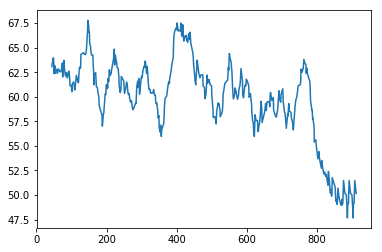

In [30]:
df_t[df_t['H_V'] == 'H']['AST%'].rolling(20).mean().plot()

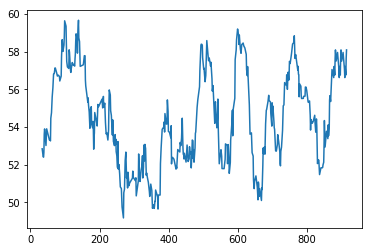

In [31]:
df_t[df_t['H_V'] == 'V']['AST%'].rolling(20).mean().plot()

In [32]:
## Creating a new column if the team won or not:

def map_win(x):
    #print(x)
    if x['H_V'] == 'H' and x['LABEL'] == 1:
        
        return 1
    
    elif x['H_V'] == 'V' and x['LABEL'] == 0:
        return 1
    
    else:
        return 0
    

In [33]:
df_t['WIN'] = df_t.apply(map_win, axis=1)

In [34]:
df_t.tail()

,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,...,DATE,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V,WIN
910,0.476,0.375,0.767,11.0,29.0,40.0,20.0,5.0,5.0,11.0,...,2018-12-21,7:00p,Cleveland Cavaliers,Toronto Raptors,19800.0,5,2019,1,V,0
911,0.452,0.304,0.643,7.0,24.0,31.0,11.0,5.0,2.0,11.0,...,2018-12-23,6:00p,Chicago Bulls,Cleveland Cavaliers,19432.0,7,2019,0,H,0
912,0.355,0.310,0.800,19.0,34.0,53.0,19.0,9.0,1.0,16.0,...,2018-12-26,8:00p,Cleveland Cavaliers,Memphis Grizzlies,16424.0,3,2019,1,V,0
913,0.383,0.351,0.864,9.0,33.0,42.0,21.0,6.0,2.0,14.0,...,2018-12-28,8:00p,Cleveland Cavaliers,Miami Heat,19617.0,5,2019,1,V,0
914,0.471,0.217,0.793,10.0,34.0,44.0,27.0,9.0,2.0,12.0,...,2018-12-29,7:30p,Cleveland Cavaliers,Atlanta Hawks,16460.0,6,2019,1,V,0


### Computing home advantage

In [35]:
year = 2017

In [36]:
data = df_t[df_t['YEAR'] == year]

In [37]:
Counter(data['WIN'])

Counter({1: 64, 0: 36})

In [38]:
## HOME-VISITOR WIN:

data_home = data[data['H_V'] == 'H' ]
data_visitor = data[data['H_V'] == 'V' ]

print('Pct of home win:')
print(Counter(data_home['WIN']))

print('Pct of visitor win:')
print(Counter(data_visitor['WIN']))

Pct of home win:
Counter({1: 37, 0: 12})
Pct of visitor win:
Counter({1: 27, 0: 24})


In [39]:
home_wins = Counter(data_visitor['WIN'])

In [40]:
list(home_wins.keys())

[1, 0]

In [41]:
len_df = len(data_visitor)
for key in list(home_wins.keys()):
    tot = home_wins[key]
    print(key, ':', round(tot/len_df, 2)*100, '%')

1 : 53.0 %
0 : 47.0 %


In [42]:
# Home advantage:

In [43]:
def computing_home_advantage(df,window=20):
    
    df = df.reset_index()
    df['HOME_ADVANTAGE'] = 0
    
    for i in range(len(df)):
        if i<window:
            pass
        else:
            print(i)
            data = df[i-window:i]
            data_home = data[data['H_V'] == 'H' ]
            print('TOTAL GAMES PLAYED AT HOME:', len(data_home))
            
            data_visitor = data[data['H_V'] == 'V' ]
            print('TOTAL GAMES PLAYED AT VISITOR:', len(data_visitor))
            
            home_wins = Counter(data_home['WIN'])
            
            visitor_wins = Counter(data_visitor['WIN'])
            
            len_df = len(data_home)
            #print('HOME PCT WINS')
            h_w = round(home_wins[1]/len_df, 3)*100
            #print(round(home_wins[1]/len_df, 3)*100, '%')
            
            len_df = len(data_visitor)
            #print('VISITOR PCT WINS')
            v_w = round(visitor_wins[1]/len_df, 3)*100
            #print(round(visitor_wins[1]/len_df, 3)*100, '%')
            
            print('HOME ADVANTAGE:', (h_w - v_w))
            df['HOME_ADVANTAGE'][i] = (h_w - v_w)
           
            print('#####################')
        
    
    return df

In [44]:
d= computing_home_advantage(data)

20
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 15.099999999999994
#####################
21
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 15.099999999999994
#####################
22
TOTAL GAMES PLAYED AT HOME: 12
TOTAL GAMES PLAYED AT VISITOR: 8
HOME ADVANTAGE: 20.799999999999997
#####################
23
TOTAL GAMES PLAYED AT HOME: 12
TOTAL GAMES PLAYED AT VISITOR: 8
HOME ADVANTAGE: 20.799999999999997
#####################
24
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 26.19999999999999
#####################
25
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 26.19999999999999
#####################
26
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 26.19999999999999


/home/mikel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#####################
27
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 35.3
#####################
28
TOTAL GAMES PLAYED AT HOME: 12
TOTAL GAMES PLAYED AT VISITOR: 8
HOME ADVANTAGE: 41.7
#####################
29
TOTAL GAMES PLAYED AT HOME: 12
TOTAL GAMES PLAYED AT VISITOR: 8
HOME ADVANTAGE: 41.7
#####################
30
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 46.50000000000001
#####################
31
TOTAL GAMES PLAYED AT HOME: 12
TOTAL GAMES PLAYED AT VISITOR: 8
HOME ADVANTAGE: 41.7
#####################
32
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 35.3
#####################
33
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 35.3
#####################
34
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME ADVANTAGE: 26.19999999999999
#####################
35
TOTAL GAMES PLAYED AT HOME: 11
TOTAL GAMES PLAYED AT VISITOR: 9
HOME 

In [45]:
d.tail()

,index,FG%,3P%,FT%,ORB,DRB,TRB,AST,STL,BLK,...,START,VISITOR,HOME,ATTEND,DAY_OF_WEEK,YEAR,LABEL,H_V,WIN,HOME_ADVANTAGE
95,705,0.349,0.355,0.800,15.0,44.0,59.0,15.0,0.0,6.0,...,9:00p,Cleveland Cavaliers,Golden State Warriors,19596.0,4,2017,1,V,0,-10
96,706,0.450,0.276,0.789,10.0,31.0,41.0,27.0,15.0,1.0,...,8:00p,Cleveland Cavaliers,Golden State Warriors,19596.0,7,2017,1,V,0,-6
97,707,0.444,0.273,0.840,10.0,27.0,37.0,17.0,9.0,3.0,...,9:00p,Golden State Warriors,Cleveland Cavaliers,20562.0,3,2017,0,H,0,-4
98,708,0.529,0.533,0.677,11.0,30.0,41.0,27.0,6.0,3.0,...,9:00p,Golden State Warriors,Cleveland Cavaliers,20562.0,5,2017,1,H,1,-7
99,709,0.534,0.458,0.652,12.0,28.0,40.0,22.0,6.0,5.0,...,9:00p,Cleveland Cavaliers,Golden State Warriors,19596.0,1,2017,1,V,0,3


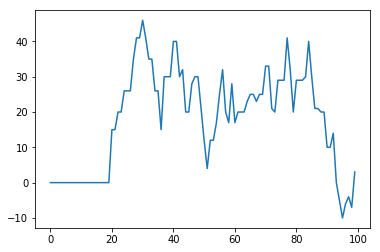

In [46]:
d['HOME_ADVANTAGE'].plot()